In [3]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

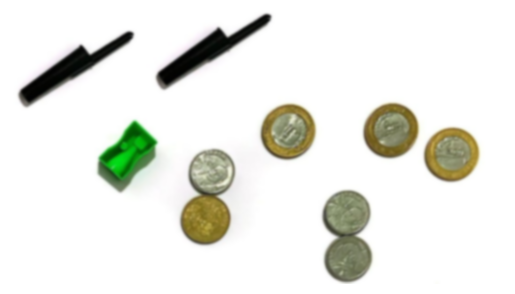

In [4]:
def apply_gaussian_filter(image, kernel_size=(5, 5), sigma_x=0):
    return cv2.GaussianBlur(image, kernel_size, sigma_x)

# Exemplo de uso:
imagem_inicial = cv2.imread('imagem.jpg')

# Aplica o filtro gaussiano com o tamanho do kernel (5, 5) e sigma_x 0
result = apply_gaussian_filter(imagem_inicial, kernel_size=(7, 7), sigma_x=0)
result = apply_gaussian_filter(result, kernel_size=(7, 7), sigma_x=0)
result = apply_gaussian_filter(result, kernel_size=(7, 7), sigma_x=0)
result = apply_gaussian_filter(imagem_inicial, kernel_size=(7, 7), sigma_x=0)
result = apply_gaussian_filter(result, kernel_size=(7, 7), sigma_x=0)
result = apply_gaussian_filter(result, kernel_size=(7, 7), sigma_x=0)






# Exibe a imagem original e a imagem após a aplicação do filtro
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(result)
plt.axis('off')  # Desativar os eixos
plt.show()

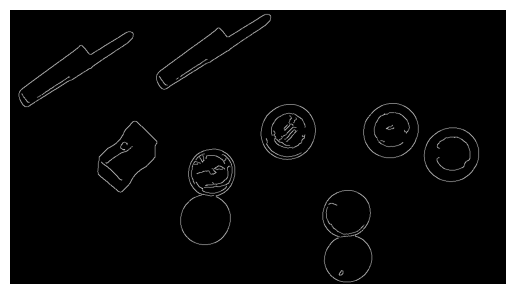

In [6]:
def apply_canny_edge_detection_colored(image, low_threshold, high_threshold, edge_color):
    edges = cv2.Canny(image, low_threshold, high_threshold)

    edges_colored = np.copy(image)

    edges_colored[edges != 0] = edge_color

    return edges

# Exemplo de uso:
img = result

# Aplica o Filtro de Canny com limiares 50 e 150
result_canny = apply_canny_edge_detection_colored(img, low_threshold=50, high_threshold=140, edge_color=(255,0,0))

result_canny_show = cv2.cvtColor(result_canny, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(result_canny_show)
plt.axis('off')  # Desativar os eixos
plt.show()

nao entrou
nao entrou
nao entrou


C:\Users\phrod\AppData\Local\Temp\ipykernel_23008\2449753873.py:22: RuntimeWarning: overflow encountered in scalar subtract
  size_difference = abs(reference_circle[2] - circle[2]) / reference_circle[2]


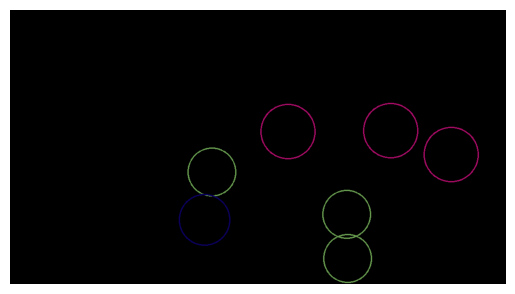

Elemento 0 = 3
Elemento 1 = 3
Elemento 2 = 1


In [10]:
def extract_and_color_circles_with_error(image, size_error_margin=0.05):
    total = 0
    # Encontre os contornos na imagem binária
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crie uma imagem colorida preta do mesmo tamanho que a imagem original
    result_colored = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Aplique a transformada de Hough para círculos
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=35, maxRadius=100)

    # Agrupe círculos próximos e do mesmo tamanho
    grouped_circles = []
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            # Verifique se o círculo pertence a um grupo existente
            found_group = False
            for group in grouped_circles:
                reference_circle = group[0]
                size_difference = abs(reference_circle[2] - circle[2]) / reference_circle[2]
                if size_difference <= size_error_margin:
                    group.append(circle)
                    found_group = True
                    break

            # Se não pertencer a nenhum grupo, crie um novo grupo
            if not found_group:
                print('nao entrou')
                grouped_circles.append([circle])

    # Extract and count the grouped circles
    circle_counts = {}
    for group in grouped_circles:
        # Determine a unique color for each group of circles
        color = tuple(map(int, np.random.randint(0, 256, size=3)))

        for circle in group:
            # Draw and paint the circles on the resulting image
            cv2.circle(result_colored, (circle[0], circle[1]), circle[2], color, 2)

            # Count the circles for each group
            circle_id = tuple(circle)
            circle_counts[circle_id] = circle_counts.get(circle_id, 0) + 1

    return result_colored, circle_counts, grouped_circles

# Example usage:
img = result_canny

# Extract and color the circles from the binary image with a size error margin
result_colored, circle_counts, x = extract_and_color_circles_with_error(img, size_error_margin=0.01)
imagem_bordas_circulares = cv2.subtract(imagem_inicial, result_colored)

# Converter de BGR para RGB (o matplotlib usa o formato RGB)
result_colored_show = cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(result_colored_show)
plt.axis('off')  # Desativar os eixos
plt.show()
elemento = 0
for y in x:
    print(f'Elemento {elemento} = {len(y)}')
    elemento = elemento+1


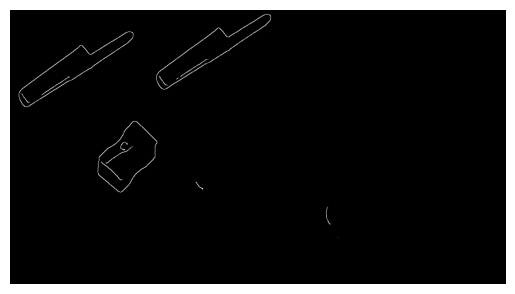

In [11]:
def remover_nao_circulares(imagem_binaria):
    # Encontrar contornos na imagem
    contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma máscara para os objetos circulares
    mascara_circulos = np.zeros_like(imagem_binaria)

    # Iterar sobre os contornos e desenhar os círculos na máscara
    for contorno in contornos:
        perimetro = cv2.arcLength(contorno, True)
        # Aproximar o contorno para determinar a forma
        aprox_contorno = cv2.approxPolyDP(contorno, 0.019 * perimetro, True)
        # Se o contorno for aproximadamente circular
        if len(aprox_contorno) < 7:
            cv2.drawContours(mascara_circulos, [contorno], -1, 255, thickness=cv2.FILLED)

    # Aplicar a máscara na imagem original
    resultado = cv2.bitwise_and(imagem_binaria, mascara_circulos)

    return resultado


# Exemplo de uso
resultado_sem_circulos = remover_nao_circulares(result_canny)
# Converter de BGR para RGB (o matplotlib usa o formato RGB)
resultado_sem_circulos_show = cv2.cvtColor(resultado_sem_circulos, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(resultado_sem_circulos_show)
plt.axis('off')  # Desativar os eixos
plt.show()

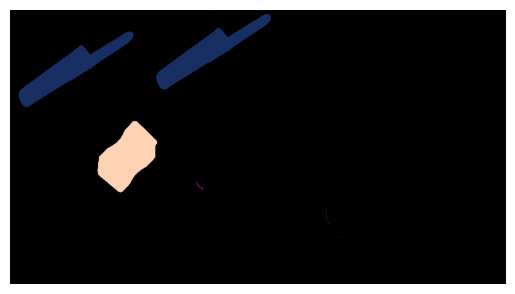

In [12]:
def calcular_diferenca_momentos(momentos1, momentos2):
    # Calcular a diferença entre os momentos de Hu
    diff = cv2.absdiff(momentos1, momentos2)
    return np.sum(diff)

def pintar_objetos_iguais(imagem_binaria):
    imagem_binaria = cv2.dilate(imagem_binaria, np.ones((5, 5), np.uint8), iterations=1)
    imagem_binaria = cv2.erode(imagem_binaria, np.ones((5, 5), np.uint8), iterations=1)

    # Encontrar contornos na imagem
    contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma cópia colorida da imagem para pintar os objetos
    imagem_colorida = cv2.cvtColor(imagem_binaria, cv2.COLOR_GRAY2BGR)

    # Inicializar um dicionário para mapear momentos de Hu para cores
    momentos_cores = {}

    # Iterar sobre os contornos
    for i, contorno in enumerate(contornos):
        # Calcular momentos de Hu
        momentos_hu = cv2.HuMoments(cv2.moments(contorno)).flatten()

        # Encontrar uma cor correspondente para o objeto
        cor = None
        for momentos_existente, cor_existente in momentos_cores.items():
            # Se a diferença entre os momentos for menor que um limite, considerar iguais
            if calcular_diferenca_momentos(momentos_hu, momentos_existente) < 0.1:
                cor = cor_existente
                break

        # Se não encontrou uma cor correspondente, atribuir uma nova cor
        if cor is None:
            cor = tuple(np.random.randint(0, 255, size=(3,)).tolist())
            momentos_cores[tuple(momentos_hu)] = cor

        # Pintar o objeto com a cor correspondente
        cv2.drawContours(imagem_colorida, [contorno], -1, cor, thickness=cv2.FILLED)

    return imagem_colorida
# Exemplo de uso
imagem_resultante = pintar_objetos_iguais(resultado_sem_circulos)

# Exibir a imagem resultante
# Converter de BGR para RGB (o matplotlib usa o formato RGB)
resultado_final = cv2.cvtColor(imagem_resultante, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando matplotlib
plt.imshow(resultado_final)
plt.axis('off')  # Desativar os eixos
plt.show()